# Climate Data Analysis

In [41]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import matplotlib.colors as mcolors
sys.version

'3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]'

In [28]:
#Load climate data from a CSV file
data = pd.read_csv('Marine_CSV_sample.csv')

#Data cleaning and preprocessing
#Remove rows with missing values
data.dropna(inplace = True)

#Convert Time of Observation to a datetime format
data['Time of Observation'] = pd.to_datetime(data['Time of Observation'])

#Select specific columns for analysis
selected_columns = ['Latitude', 'Longitude', 'Ice Accretion On Ship', 'Sea Level Pressure', 'Air Temperature', 'Sea Surface Temperature', 'Wave Height', 'Total Cloud Amount', 'Visibility', 'Wind Direction', 'Wind Speed', 'Time of Observation']

#Extract the selected columns from the data
selected_data = data[selected_columns]

#Statistical analysis
#Calculate mean, median, and standard deviation for each selected column
statistics = selected_data.describe()

# Data Visualization

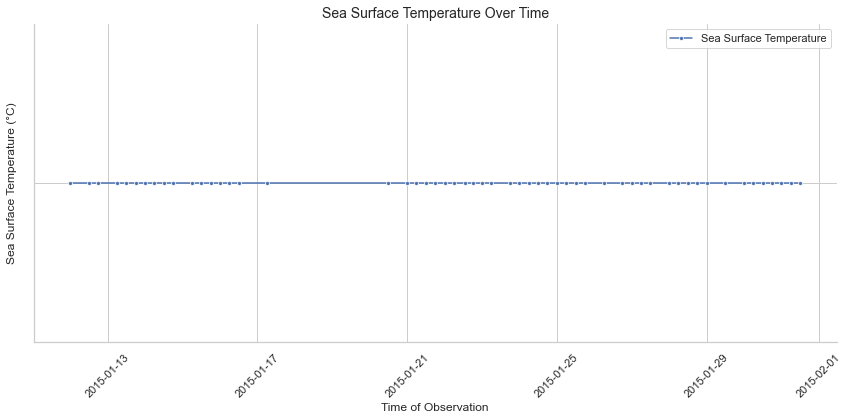

In [40]:
#Time Series Analysis to Identify Trends
#Set the style and context of the plot
sns.set_style("whitegrid")
sns.set_context("notebook")

#Create a line plot with seaborn
plt.figure(figsize = (12, 6))
sns.lineplot(x = selected_data['Time of Observation'], y = selected_data['Sea Surface Temperature'], marker = "o", color = "b", markersize = 4, label = "Sea Surface Temperature")
plt.title('Sea Surface Temperature Over Time', fontsize = 14)
plt.xlabel('Time of Observation', fontsize = 12)
plt.ylabel('Sea Surface Temperature (°C)', fontsize = 12)
plt.xticks(rotation = 45)  #Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)

#Add grid lines and customize the plot
sns.despine()
plt.tight_layout()

plt.show()

C:\Users\ehram\AppData\Local\Temp\ipykernel_9356\446507068.py:19: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(scatter)


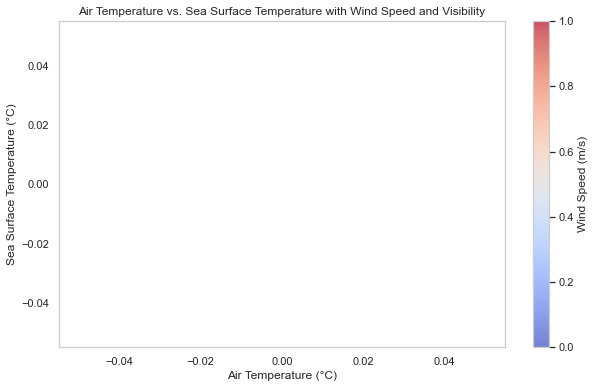

In [46]:
# Create a colormap for better visualization
colors = mcolors.CSS4_COLORS

# Calculate point size based on Visibility
point_size = selected_data['Visibility'] * 5  # You can adjust the scaling factor

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    x=selected_data['Air Temperature'],
    y=selected_data['Sea Surface Temperature'],
    c=selected_data['Wind Speed'],
    cmap=color_map,
    s=point_size,
    alpha=0.7,
)

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Wind Speed (m/s)')

# Add labels and title
plt.title('Air Temperature vs. Sea Surface Temperature with Wind Speed and Visibility')
plt.xlabel('Air Temperature (°C)')
plt.ylabel('Sea Surface Temperature (°C)')

# Explicitly turn off the grid
plt.grid(False)

plt.show()

Text(0, 0.5, 'Latitude')

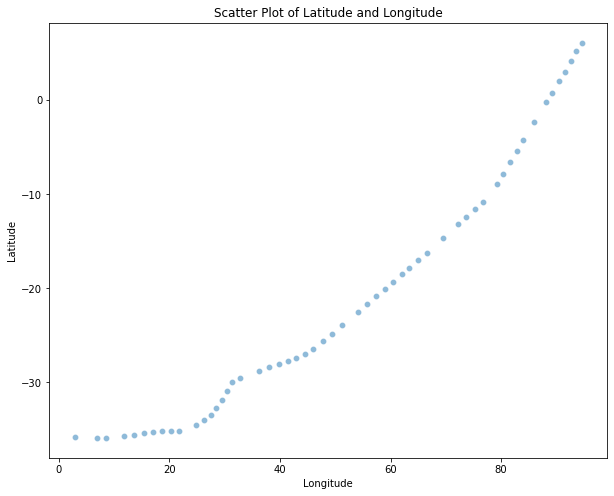

In [9]:
# Create a scatter plot of latitude and longitude
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Longitude', y='Latitude', data=data, alpha=0.5)
plt.title('Scatter Plot of Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

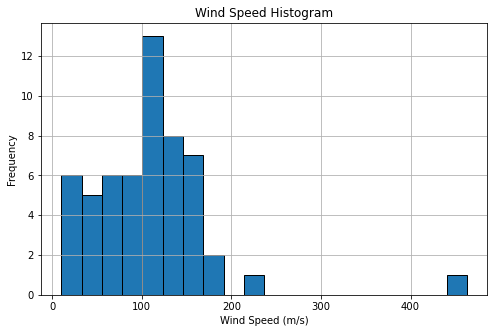

In [10]:
#Histogram
plt.figure(figsize = (8, 5))
plt.hist(selected_data['Wind Speed'], bins = 20, edgecolor = 'k')
plt.title('Wind Speed Histogram')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

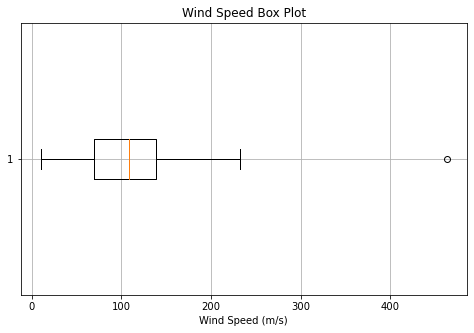

In [11]:
#Box plot for Wind Speed
plt.figure(figsize=(8, 5))
plt.boxplot(selected_data['Wind Speed'], vert = False)
plt.title('Wind Speed Box Plot')
plt.xlabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()

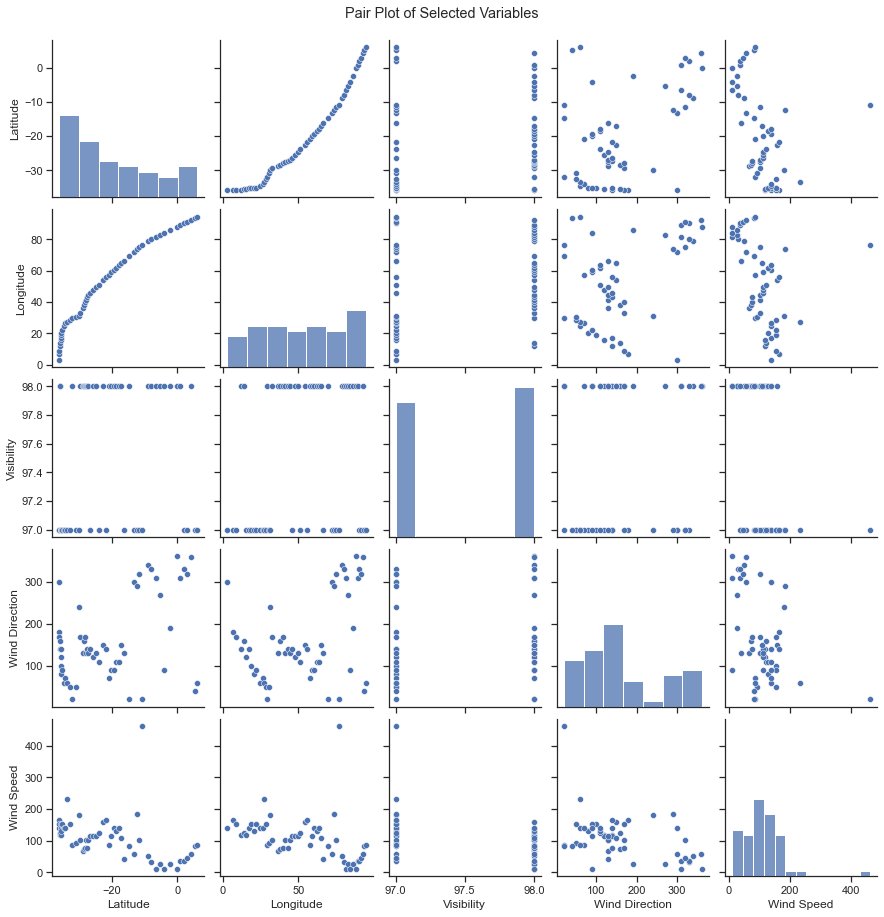

In [12]:
#Pair plot for selected variables
sns.set(style = "ticks")
sns.pairplot(selected_data)
plt.suptitle("Pair Plot of Selected Variables", y = 1.02)
plt.show()

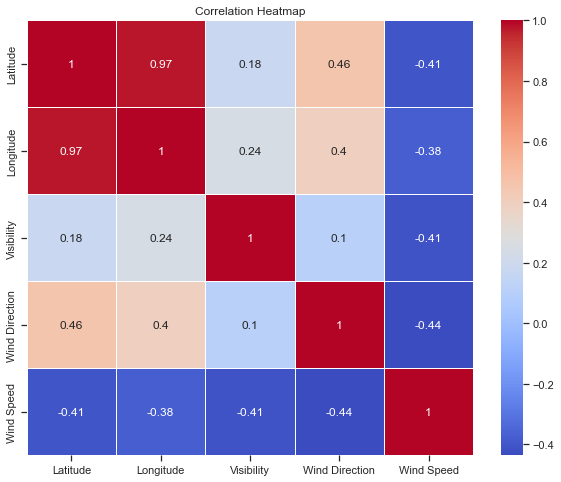

In [13]:
#Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = selected_data.corr()
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm', linewidths = 0.5)
plt.title('Correlation Heatmap')
plt.show()

In [14]:
#Save the statistics to a CSV file
statistics.to_csv('climate_statistics.csv')

#Save the cleaned data to a new CSV file
selected_data.to_csv('cleaned_climate_data.csv', index = False)